In [1]:
#show plate in the notebook
%matplotlib inline

# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy.linalg

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm, neighbors, linear_model

# Import Counter
from collections import Counter

# The digits dataset
digits = datasets.load_digits()

print ("Digits data set, data shape = ", digits.data.shape)
print(digits.data)

Digits data set, data shape =  (1797, 64)
[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


first item as 8x8 array - represents value  0


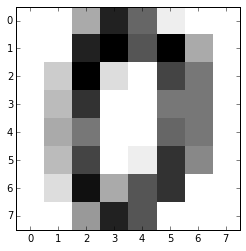

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [2]:
print ("first item as 8x8 array - represents value ", digits.target[0])
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# to see the array
digits.images[0]

In [3]:
# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 3 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# pylab.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

print n_samples

print len(data)

#plt.show()

SyntaxError: Missing parentheses in call to 'print' (<ipython-input-3-976d6eb5caaf>, line 19)

In [21]:
# Create a classifier: a support vector classifier
#classifier = svm.SVC(gamma=0.001)
#classifier = neighbors.KNeighborsClassifier()
#classifier = linear_model.LogisticRegression()
data_sample = (n_samples/2)

dist = [[0 for x in range(2)] for x in range(n_samples/2)]
k_neighbors = []
k = [1,3,5,100,500]
predicted = [[0 for x in range(len(k))] for x in range(n_samples/2)]
predicted_k = []
data_test = data[n_samples/2 + 1:]
expected = digits.target[n_samples / 2 + 1:]
print len(expected)
for index_sample in range(0, n_samples/2):
    
    for index in range(0, n_samples/2):
        dist[index][0] = numpy.linalg.norm(data[index]-data_test[index_sample])
        dist[index][1] = digits.target[index]

    dist.sort(key=lambda dist: dist[0])
    
    #del predicted[:]
    
    for k_iterator in range(len(k)):
        
        del k_neighbors[:]
    
        for index_k in range (k[k_iterator]):
            k_neighbors.insert(index_k, dist[index_k][1])
    
        #predicted.insert(index_sample,Counter(k_neighbors).most_common(1)[0][0])
        predicted[index_sample][k_iterator] = Counter(k_neighbors).most_common(1)[0][0]


for k_iterator in range(len(k)):
    del predicted_k[:]
    for index in range (n_samples/2):
        predicted_k.insert(index, predicted[index][k_iterator])

    print("Classification report for k = %s:\n%s\n"
                        % (k[k_iterator], metrics.classification_report(expected, predicted_k)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted_k))

    
# We learn the digits on the first half of the digits
#classifier.fit(data[:n_samples / 2], digits.target[:n_samples / 2])

898
Classification report for k = 1:
             precision    recall  f1-score   support

          0       0.99      0.99      0.99        88
          1       0.96      0.97      0.96        91
          2       0.99      0.97      0.98        86
          3       0.91      0.92      0.92        91
          4       0.99      0.95      0.97        92
          5       0.96      0.98      0.97        91
          6       0.99      1.00      0.99        91
          7       0.99      0.99      0.99        89
          8       0.94      0.92      0.93        87
          9       0.91      0.93      0.92        92

avg / total       0.96      0.96      0.96       898


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  2  0]
 [ 1  0 83  2  0  0  0  0  0  0]
 [ 0  0  0 84  0  2  0  1  2  2]
 [ 0  0  0  0 87  0  0  0  0  5]
 [ 0  0  0  0  0 89  1  0  0  1]
 [ 0  0  0  0  0  0 91  0  0  0]
 [ 0  0  0  0  0  0  0 88  1  0]
 [ 0  4  0  2  0  0  0  0 80  1]
 [ 0  0 

In [20]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted_k))

Confusion matrix:
[[86  0  0  0  1  0  1  0  0  0]
 [ 3  6 28  9  7  0 13  0 17  8]
 [ 2  0 24 52  0  0  7  0  1  0]
 [ 1  0  1 80  0  2  0  3  4  0]
 [26  0  1  0 40  2 20  2  1  0]
 [11  0  0 21  0 51  5  0  0  3]
 [ 8  1  0  0  0  0 82  0  0  0]
 [ 0  0  3  3  4  4  0 59 16  0]
 [ 6  0  9 19  2 12  4  1 32  2]
 [14  0  0 67  0  5  0  1  0  5]]


In [ ]:
# 